In [41]:
import SALib
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
from SALib.plotting.bar import plot as barplot
import numpy as np
import pandas as pd
from typing import Dict, List

In [28]:
df=pd.read_csv('Truncated_distribution.csv')
df_1=df
df_1=df_1.dropna()
df_1=df_1.astype('float')
arr= df_1.to_numpy()
df_1

,ROOF,WALL,FLOOR,WIN,SHGC,LPD,HEATEFF,COP,EPD,HSP,CSP,OCC,TOTAL_E
0,2.396621,0.816530,1.670275,2.981330,0.382503,9.991737,3.330941,2.814300,9.534709,23.990872,24.356802,0.066092,1822.066708
1,2.474798,0.735186,1.766380,2.750136,0.388696,10.442007,3.199602,2.805457,10.610612,23.909900,24.089141,0.064407,1937.343255
2,2.333064,0.861973,1.907219,3.230318,0.386347,10.675432,3.401459,2.821833,10.032985,23.007489,23.747162,0.063603,1878.576908
3,2.538011,0.724493,1.665590,2.920763,0.393201,10.882699,3.187261,2.829474,8.609092,22.994690,23.257141,0.064066,1786.203027
4,2.423295,0.746269,1.816468,3.051933,0.397592,10.972116,3.224106,2.944937,8.311315,22.980794,24.760668,0.061518,1718.904557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.989346,1.231477,2.925555,1.682065,0.369434,7.968231,3.355532,3.565058,8.209622,23.056993,23.429601,0.061047,1508.423957
996,4.878672,1.289806,2.813634,1.707063,0.366512,8.197612,3.215910,3.560828,9.845576,23.043899,23.775206,0.062352,1651.267833
997,5.249244,1.228883,2.937957,1.626146,0.363849,7.560314,3.222589,3.473977,10.199208,23.039349,24.029898,0.055857,1657.576439
998,4.868008,1.241546,2.839385,1.662289,0.375830,8.458046,3.358054,3.509900,7.868177,23.027041,23.292411,0.060141,1502.116197


In [7]:
problem = ({
    'num_vars' : 12,
    'names' : ['ROOF','WALL','FLOOR', 'WIN', 'SHGC', 'LPD', 'HEATEFF', 'COP', 'EPD', 'HSP', 'CSP', 'OCC'],
    'bounds' : [
        [0.184, 0.358], #Roof   U-value
        [0.513, 0.698], #Wall   U-value
        [0.321, 0.494], #Floor  U-value
        [1.79 , 3.24 ], #Window U-value
        [0.38 , 0.40 ], #Window SHGC
        [8.5  , 11   ], #LPD
        [3.1  , 3.2  ], #HEATEFF
        [2.78 , 3.4  ], #COP
        [7.79 , 11   ], #EPD
        [19   , 24   ], #Heating Set Point
        [20   , 25   ], #Cooling Set Point
        [0.05 , 0.07 ] #OCC
    ]
})

In [30]:
param_values = saltelli.sample(problem, 32)
arr = arr[0:832,]
Y = Ishigami.evaluate(arr)

<AxesSubplot:>

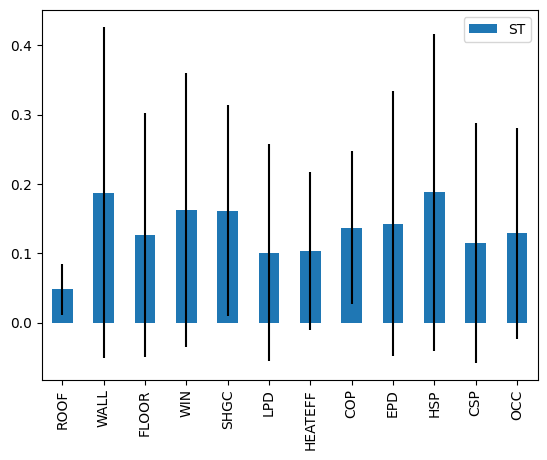

In [50]:
Si_Sobol = sobol.analyze(problem, Y)
total, first, second = Si_Sobol.to_df()
barplot(total)
